**Project: AI-Based Hand X-Ray Abnormality Detection**

Objective & Importance of the Dataset:

This project aims to detect abnormalities in hand X-ray images using deep learning models. The dataset consists of X-ray images of my own hands, which are unfortunately not operable at the moment. Since traditional medical approaches do not provide a solution, I want to explore AI-based detection techniques.

By training a model on normal and abnormal hand X-rays, the goal is to create an AI system that can identify specific anomalies and, in the future, help guide potential new surgical or treatment techniques.

Future Goals
This project is not just about classifying normal vs. abnormal hands. It could evolve into:

* Segmenting affected areas (e.g., using U-Net)
* Exploring possible AI-assisted surgery planning
* Deploying the model for easy medical testing access

By refining this system, AI could play a role in detecting and analyzing non-operable hand conditions, potentially helping others or myself in similar situations.


1. Environment(Loading and display data and resizing and labeling images)

1.1 Loading and displaying images

Steps explanation:

* Use of files.upload() to manually upload images.

* The images are stored in a dictionary, and we extract their names.

* The images are displayed using Matplotlib for verification.

Saving Radio main 1.png to Radio main 1.png
Saving Radio main 2.png to Radio main 2.png
Saving Radio main 3.png to Radio main 3.png
Saving Radio main normale 1.webp to Radio main normale 1.webp
Saving Radio main normale 2.jpg to Radio main normale 2.jpg


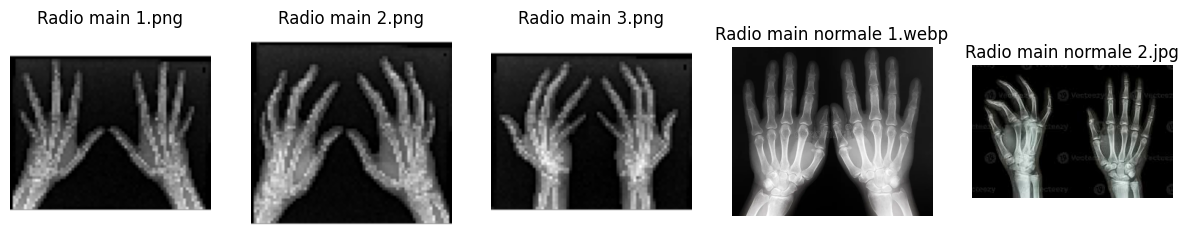

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from google.colab import files
from PIL import Image

# Upload images manually in Google Colab
uploaded_files = files.upload()

# Convert uploaded files to list
image_names = list(uploaded_files.keys())

# Display images
fig, axes = plt.subplots(1, len(image_names), figsize=(15,5))

for i, img_name in enumerate(image_names):
    img = Image.open(img_name)
    axes[i].imshow(img, cmap="gray")
    axes[i].axis("off")
    axes[i].set_title(img_name)

plt.show()


1.2 Resizing & labeling images

Since we are dealing with individual images, we need to manually define which ones are normal vs. abnormal.

Steps explanation:

* Manually label normal and abnormal images.

* Convert them to grayscale and resize them to 224x224 pixels.

* Normalize pixel values between 0 and 1 for better training.

* Store images in X and labels in y.

In [4]:
# Define normal and abnormal images manually
normal_images = ["/content/Radio main normale 1.webp", "/content/Radio main normale 2.jpg"]
abnormal_images = ["/content/Radio main 1.png", "/content/Radio main 2.png", "/content/Radio main 3.png"]

# Resize all images to 224x224
image_size = (224, 224)

def preprocess_image(image_name):
    img = Image.open(image_name).convert("L")  # Convert to grayscale
    img = img.resize(image_size)  # Resize to (224, 224)
    img = np.array(img) / 255.0  # Normalize
    return img

# Apply preprocessing
X = [preprocess_image(img) for img in normal_images + abnormal_images]
y = [0] * len(normal_images) + [1] * len(abnormal_images)  # 0 = normal, 1 = abnormal

# Convert to NumPy arrays
X = np.array(X).reshape(-1, 224, 224, 1)  # Add channel dimension
y = np.array(y)

print("Data Preprocessing Complete!")


Data Preprocessing Complete!


2. Building and traing CNN model

2.1 Creating a CNN model

Steps explanation:

* Conv2D layers extract features from X-ray images.

* MaxPooling reduces the size while keeping key information.

* Flatten converts the output into a 1D array.

* Dense layers help classify images as normal or abnormal.

* Dropout (50%) prevents overfitting.

* Sigmoid activation is used since this is a binary classification problem.

In [5]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Define CNN architecture
model = Sequential([
    Conv2D(32, (3,3), activation="relu", input_shape=(224, 224, 1)),
    MaxPooling2D(2,2),

    Conv2D(64, (3,3), activation="relu"),
    MaxPooling2D(2,2),

    Flatten(),
    Dense(128, activation="relu"),
    Dropout(0.5),
    Dense(1, activation="sigmoid")  # Binary classification (0 = normal, 1 = abnormal)
])

# Compile the model
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

# Print summary
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 222, 222, 32)        │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 186624)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │      23,888,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 23,906,945 (91.20 MB)

 Trainable params: 23,906,945 (91.20 MB)

 Non-trainable params: 0 (0.00 B)

2.2 Training the model using data augmentation since it's a small dataset

Steps explanation:

* Data augmentation adds variability by flipping and rotating images.

* We train the model with 4 images per batch for 10 epochs.

In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Augmentation for better generalization
datagen = ImageDataGenerator(rotation_range=20, width_shift_range=0.2, height_shift_range=0.2, horizontal_flip=True)

# Train the model
history = model.fit(datagen.flow(X, y, batch_size=4), epochs=10, verbose=1)


Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 872ms/step - accuracy: 0.2667 - loss: 1.2227
Epoch 2/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 430ms/step - accuracy: 0.6500 - loss: 0.5678
Epoch 3/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 793ms/step - accuracy: 0.5333 - loss: 4.2780
Epoch 4/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 781ms/step - accuracy: 0.6000 - loss: 0.5316
Epoch 5/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 434ms/step - accuracy: 0.5667 - loss: 0.9133
Epoch 6/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 810ms/step - accuracy: 0.2667 - loss: 2.2811
Epoch 7/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 445ms/step - accuracy: 0.3500 - loss: 1.2380
Epoch 8/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 535ms/step - accuracy: 0.4333 - loss: 0.5861
Epoch 9/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 672ms/step - accuracy: 0.7833 - loss: 0.5983
Epoch 10/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 451ms/step - accuracy: 0.6500 - loss: 0.6058


3. Evaluating the model

Steps explanation:

* The model predicts whether an X-ray is normal or abnormal.

* We convert probabilities into binary predictions (0 or 1).

* Confusion matrix & classification report show how well the model performs.

In [7]:
from sklearn.metrics import classification_report, confusion_matrix

# Predict on the same dataset (since we have no separate test set yet)
y_pred = model.predict(X)
y_pred = (y_pred > 0.5).astype(int)  # Convert probabilities to binary values

# Print classification report
print(classification_report(y, y_pred))

# Confusion matrix
print("Confusion Matrix:\n", confusion_matrix(y, y_pred))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 370ms/step
              precision    recall  f1-score   support

           0       1.00      0.50      0.67         2
           1       0.75      1.00      0.86         3

    accuracy                           0.80         5
   macro avg       0.88      0.75      0.76         5
weighted avg       0.85      0.80      0.78         5

Confusion Matrix:
 [[1 1]
 [0 3]]


4. Segmentation (U-Net for Region Detection)

Instead of just classifying X-rays, we're going to segment affected areas using U-Net.

Steps explanation:

* U-Net detects specific regions in X-ray images instead of just classifying them.

* UpSampling + Concatenation helps refine the detected regions.

4.1 Building the U-net Model : commonly used for medical image segmentation

In [9]:
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPooling2D, UpSampling2D, Concatenate, Input
from tensorflow.keras.models import Model

# Function to build U-Net model
def build_unet():
    inputs = Input((224, 224, 1))  # Input layer for grayscale images

    # Encoder (Feature Extraction)
    conv1 = Conv2D(64, (3,3), activation="relu", padding="same")(inputs)
    pool1 = MaxPooling2D((2,2))(conv1)

    conv2 = Conv2D(128, (3,3), activation="relu", padding="same")(pool1)
    pool2 = MaxPooling2D((2,2))(conv2)

    # Bottleneck
    conv3 = Conv2D(256, (3,3), activation="relu", padding="same")(pool2)

    # Decoder (Reconstruction)
    up1 = UpSampling2D((2,2))(conv3)
    concat1 = Concatenate()([conv2, up1])
    conv4 = Conv2D(128, (3,3), activation="relu", padding="same")(concat1)

    up2 = UpSampling2D((2,2))(conv4)
    concat2 = Concatenate()([conv1, up2])
    conv5 = Conv2D(64, (3,3), activation="relu", padding="same")(concat2)

    # Output layer (Segmentation Mask)
    outputs = Conv2D(1, (1,1), activation="sigmoid")(conv5)

    return Model(inputs, outputs)

# Create and compile the model
unet_model = build_unet()
unet_model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

# Display model summary
unet_model.summary()


Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2             │ (None, 224, 224, 1)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_6 (Conv2D)         │ (None, 224, 224, 64)   │            640 │ input_layer_2[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_3           │ (None, 112, 112, 64)   │              0 │ conv2d_6[0][0]         │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_7 (Conv2D)         │ (None, 112, 112, 128)  │         73,856 │ max_pooling2d_3[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_4           │ (None, 56, 56, 128)    │              0 │ conv2d_7[0][0]         │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_8 (Conv2D)         │ (None, 56, 56, 256)    │        295,168 │ max_pooling2d_4[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ up_sampling2d_1           │ (None, 112, 112, 256)  │              0 │ conv2d_8[0][0]         │
│ (UpSampling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate_1             │ (None, 112, 112, 384)  │              0 │ conv2d_7[0][0],        │
│ (Concatenate)             │                        │                │ up_sampling2d_1[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_9 (Conv2D)         │ (None, 112, 112, 128)  │        442,496 │ concatenate_1[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ up_sampling2d_2           │ (None, 224, 224, 128)  │              0 │ conv2d_9[0][0]         │
│ (UpSampling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate_2             │ (None, 224, 224, 192)  │              0 │ conv2d_6[0][0],        │
│ (Concatenate)             │                        │                │ up_sampling2d_2[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_10 (Conv2D)        │ (None, 224, 224, 64)   │        110,656 │ concatenate_2[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_11 (Conv2D)        │ (None, 224, 224, 1)    │             65 │ conv2d_10[0][0]        │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 922,881 (3.52 MB)

 Trainable params: 922,881 (3.52 MB)

 Non-trainable params: 0 (0.00 B)

4.2 Preprocessing X-ray images

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img, img_to_array

# Function to preprocess an image
def preprocess_image(image_path):
    img = load_img(image_path, target_size=(224, 224), color_mode="grayscale")
    img_array = img_to_array(img) / 255.0  # Normalize between 0 and 1
    return img_array

# Load and preprocess X-ray images
x_train = np.array([
    preprocess_image("/content/Radio main 1.png"),
    preprocess_image("/content/Radio main 2.png"),
    preprocess_image("/content/Radio main 3.png"),
    preprocess_image("/content/Radio main normale 2.jpg")
])

# Placeholder masks (To be replaced later with real masks)
# Instead of zeros_like, create an array with shape (num_images, 224, 224, 1)
masks = np.zeros((x_train.shape[0], 224, 224, 1))  # Empty segmentation masks for now

# Check the shape of the dataset
print("X_train shape:", x_train.shape)
print("Masks shape:", masks.shape)


X_train shape: (4, 224, 224, 1)
Masks shape: (4, 224, 224, 1)


In [24]:
# Prepare training data
def prepare_data(image_files, mask_files):
    images = []
    masks = []
    # Assuming mask_files is a list of paths to mask images:
    if not mask_files:  # Check if mask_files is empty
        # If empty, generate dummy masks with the same shape as images
        for img in image_files:
            image = load_img(img, target_size=(224, 224), color_mode="grayscale")
            image = img_to_array(image) / 255.0
            # Create a dummy mask (all zeros) with the same shape as the image
            mask = np.zeros(image.shape, dtype=image.dtype)
            images.append(image)
            masks.append(mask)
    else:  # If mask_files is not empty
        for img, mask_path in zip(image_files, mask_files):
            image = load_img(img, target_size=(224, 224), color_mode="grayscale")
            mask = load_img(mask_path, target_size=(224, 224), color_mode="grayscale")
            image = img_to_array(image) / 255.0
            mask = img_to_array(mask) / 255.0
            images.append(image)
            masks.append(mask)
    return np.array(images).reshape(-1, 224, 224, 1), np.array(masks).reshape(-1, 224, 224, 1)

# Placeholder for mask_files (replace with actual mask image paths)
mask_files = []  # You need to provide actual paths here
# If mask files are not available, dummy masks will be generated

# image_files are paths to your x_train images
image_files = ["/content/Radio main 1.png", "/content/Radio main 2.png", "/content/Radio main 3.png", "/content/Radio main normale 2.jpg"]

# Convert images and masks into arrays
X_train, Y_train = prepare_data(image_files, mask_files)

# Train the model
history = unet_model.fit(X_train, Y_train, epochs=10, batch_size=4)

Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 10s 10s/step - accuracy: 1.0000 - loss: 1.2304e-14
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 9s 9s/step - accuracy: 1.0000 - loss: 2.0296e-15
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 10s 10s/step - accuracy: 1.0000 - loss: 3.5548e-16
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 9s 9s/step - accuracy: 1.0000 - loss: 6.6626e-17
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 12s 12s/step - accuracy: 1.0000 - loss: 1.3441e-17
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 10s 10s/step - accuracy: 1.0000 - loss: 2.9301e-18
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 9s 9s/step - accuracy: 1.0000 - loss: 6.9182e-19
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 9s 9s/step - accuracy: 1.0000 - loss: 1.7707e-19
Epoch 9/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 9s 9s/step - accuracy: 1.0000 - loss: 4.9126e-20
Epoch 10/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 10s 10s/step - accuracy: 1.0000 - loss: 1.4759e-20


5. Testing and Visualization

Step explanation:

* Applying the model to new X-ray images

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 671ms/step


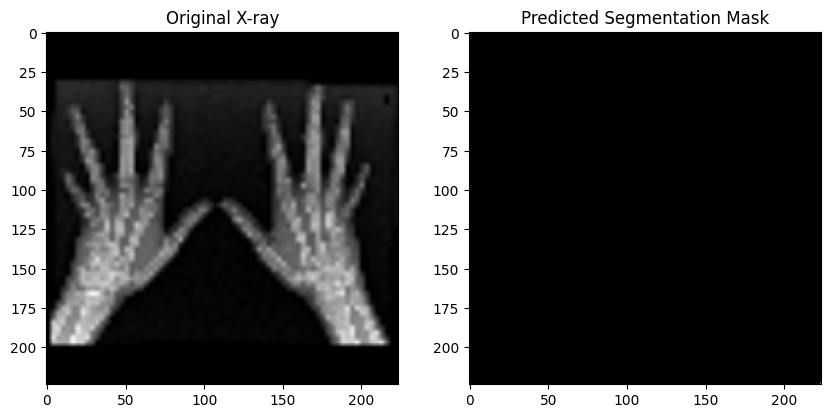

In [25]:
def predict_and_plot(image_path):
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    image = cv2.resize(image, (224, 224)) / 255.0
    image = np.expand_dims(image, axis=[0, -1])  # Add batch and channel dimensions

    # Predict mask
    pred_mask = unet_model.predict(image)[0, :, :, 0]

    # Show results
    fig, ax = plt.subplots(1, 2, figsize=(10, 5))
    ax[0].imshow(image[0, :, :, 0], cmap="gray")
    ax[0].set_title("Original X-ray")
    ax[1].imshow(pred_mask, cmap="gray")
    ax[1].set_title("Predicted Segmentation Mask")
    plt.show()

# Test with an X-ray
predict_and_plot("Radio main 1.png")


### Conclusion

The goal of this project is to explore the potential of AI in detecting abnormalities in X-ray images, specifically focusing on a rare condition that affects my own hands. My condition involves smaller pinky fingers due to a lack of bone, which makes it particularly challenging to identify and diagnose with standard medical imaging techniques.

Unfortunately, due to the rarity of this condition, I currently have a limited dataset to work with, making it difficult to fully train a robust model for accurate detection. I may even be the only person in the world with this specific case, which further complicates the availability of data.

However, I remain hopeful that, in the future, advancements in AI and medical imaging will make it possible to study, understand, and potentially provide solutions for such rare conditions. By contributing this project to the AI and medical communities, I hope to open the door for further research that could help people with similar, rare conditions.

In the long run, I believe AI could offer significant potential in diagnosing and providing solutions to medical anomalies, no matter how rare or unique they might be. This project is just the first step in what I hope will be a growing body of work that can lead to better understanding and treatments for individuals like me.

